In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Jul 18 13:22 .
drwxr-xr-x 1 root root 4096 Jul 20 21:43 ..
drwxr-xr-x 4 root root 4096 Jul 18 13:21 .config
drwxr-xr-x 1 root root 4096 Jul 18 13:22 sample_data


In [2]:
!curl -IL https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel.duckdb

HTTP/1.1 200 OK
x-amz-id-2: 7xp57QlDPNhAfisEd8Q1d50peo/RKxuXEC3CRiVAhyfs86LlrccllGBzOQMXtkmJ2093UizLz7m+Z4aqtTHgtzEglN7/NJCb
x-amz-request-id: 3DK08F4FBPG6HS9K
Date: Sat, 20 Jul 2024 21:54:12 GMT
Last-Modified: Thu, 11 Jul 2024 02:11:32 GMT
ETag: "1c075464ee93e86f6a715d4cd22f4084-167"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: binary/octet-stream
Server: AmazonS3
Content-Length: 1396453376



In [3]:
!curl -IL https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_reportingowner.duckdb

HTTP/1.1 200 OK
x-amz-id-2: isBfkecw8hdGBev+mO9k1NLR2ojlXXgosZOx/3gxrpQi0tljgw4TsNULcA6TqjWKFsrD2/Yq4rMhGJZICTzHBls2HY+FajEp
x-amz-request-id: HW47KY6063QT3EA1
Date: Sat, 20 Jul 2024 21:54:15 GMT
Last-Modified: Thu, 18 Jul 2024 22:21:12 GMT
ETag: "732d2ad75393efe30a7cf8f184e2c536-111"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: binary/octet-stream
Server: AmazonS3
Content-Length: 925380608



In [15]:
!time wget --no-clobber https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_reportingowner.duckdb

File ‘lit_reportingowner.duckdb’ already there; not retrieving.


real	0m0.023s
user	0m0.000s
sys	0m0.005s


In [16]:
!time wget --no-clobber https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel.duckdb

File ‘lit_panel.duckdb’ already there; not retrieving.


real	0m0.006s
user	0m0.001s
sys	0m0.004s


In [38]:
import duckdb

conn = duckdb.connect('lit_panel.duckdb')
q = "select * from lit_panel where issuerTradingSymbol = 'AAPL'"
df = conn.sql(q).df()
df

,URL,acceptanceDatetime,accessionNumber,type,period,filingDate,dateOfFilingDateChange,issuerCIK,documentType,periodOfReport,...,exerciseDate,exerciseDateFn,expirationDate,expirationDateFn,underlyingSecurityTitle,underlyingSecurityTitleFn,underlyingSecurityShares,underlyingSecuritySharesFn,underlyingSecurityValue,underlyingSecurityValueFn
0,https://www.sec.gov/Archives/edgar/data/118888...,20030922215255,0001181431-03-023973,4,20030805,20030922,NaN,0000320193,4,2003-08-05,...,2003-08-05,None,2013-08-05,None,Common Stock,None,10000,None,None,None
1,https://www.sec.gov/Archives/edgar/data/119872...,20030922215132,0001181431-03-023972,4,20030805,20030922,NaN,0000320193,4,2003-08-05,...,2003-08-05,None,2013-08-05,None,Common Stock,None,10000,None,None,None
2,https://www.sec.gov/Archives/edgar/data/125220...,20030929204806,0001181431-03-024715,4,20030926,20030929,NaN,0000320193,4,2003-09-26,...,None,None,None,None,None,None,None,None,None,None
3,https://www.sec.gov/Archives/edgar/data/125220...,20030710183741,0001181431-03-013739,3,20030707,20030711,NaN,0000320193,3,2003-07-07,...,None,None,None,None,None,None,None,None,None,None
4,https://www.sec.gov/Archives/edgar/data/125220...,20031023130739,0001181431-03-027338,4,20031022,20031023,NaN,0000320193,4,2003-10-22,...,2004-10-22,None,2010-10-22,None,Common Stock,None,13000,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,https://www.sec.gov/Archives/edgar/data/163198...,20240417183052,0000320193-24-000058,4,20240415,20240417,20240417.0,0000320193,4,2024-04-15,...,None,F7,None,F7,Common Stock,None,1899,None,None,None
8477,https://www.sec.gov/Archives/edgar/data/146235...,20240514183021,0000320193-24-000071,4,20240510,20240514,20240514.0,0000320193,4,2024-05-10,...,None,None,None,None,None,None,None,None,None,None
8478,https://www.sec.gov/Archives/edgar/data/163198...,20240517183033,0000320193-24-000073,4,20240515,20240517,20240517.0,0000320193,4,2024-05-15,...,None,None,None,None,None,None,None,None,None,None
8479,https://www.sec.gov/Archives/edgar/data/121412...,20240603183126,0000320193-24-000075,4,20240530,20240603,20240603.0,0000320193,4,2024-05-30,...,None,None,None,None,None,None,None,None,None,None


In [28]:
q1 = """
SELECT transactionCode, COUNT(*) AS count
FROM lit_panel
GROUP BY transactionCode
ORDER BY count DESC
"""
transaction_code_counts = conn.sql(q1).df()

print(transaction_code_counts)

   transactionCode    count
0             None  4879619
1                S  3133047
2                A  2650214
3                M  2142375
4                P   989319
5                F   761956
6                J   422797
7                D   332363
8                G   228414
9                C   175091
10               X    73607
11               L    24566
12               I    21748
13               U    16411
14               W     3762
15               H     2670
16               E     2197
17               Z     2103
18               O     1241


In [37]:
q1 = """
SELECT COUNT(*) AS count
FROM lit_panel
"""

q2 = """
SELECT COUNT(*) AS count
FROM lit_panel
WHERE (documentType = '4' OR documentType = '4/A')
AND transactionCode NOT IN ('A', 'E', 'H', 'G', 'I', 'J', 'L', 'U', 'W', 'Z') AND transactionCode IS NOT NULL
AND transactionAcquiredDisposedCode IN ('A', 'D')
AND securityTitle <> 'Restricted Stock Unit'
"""

count_result1 = conn.sql(q1).df()
count_result2 = conn.sql(q2).df()

print(count_result1)
print(count_result2)

      count
0  15863500
     count
0  7510575


In [39]:
# List of columns to drop (all columns ending with 'Fn')
columns_to_drop = [col for col in df.columns if col.endswith('Fn')]

# Drop these features too
columns_to_drop.extend(['type', 'notSubjectToSection16', 'm_isOfficer', 'm_isDirector', 'm_isTenPercentOwner', 'm_isOther', 'period', 'issuerTradingSymbol', 'equitySwapInvolved', 'filingDate', 'dateOfFilingDateChange', 'issuerCIK',
                        'periodOfReport', 'dateOfOriginalSubmission', 'transactionTimeliness', 'transactionDate',
                        'deemedExecutionDate', 'transactionFormType', 'valueOwnedFollowingTransaction',
                        'transactionTotalValue', 'tableRow', 'underlyingSecurityTitle', 'underlyingSecurityShares',
                        'underlyingSecurityValue', 'natureOfOwnership', 'conversionOrExercisePrice',
                        'directOrIndirectOwnership'])

In [40]:
# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [41]:
df.columns

Index(['URL', 'acceptanceDatetime', 'accessionNumber', 'documentType',
       'transactionType', 'securityTitle', 'transactionCode',
       'transactionShares', 'transactionPricePerShare',
       'transactionAcquiredDisposedCode', 'sharesOwnedFollowingTransaction',
       'exerciseDate', 'expirationDate'],
      dtype='object')

In [21]:
df.describe()

,acceptanceDatetime
count,8.481000e+03
mean,2.008922e+13
std,5.547376e+10
min,2.003071e+13
25%,2.005013e+13
50%,2.006033e+13
75%,2.012102e+13
max,2.024060e+13


In [22]:
# Import libraries
import pandas as pd
import numpy as np

In [42]:
# Cleanse Data

# Convert to string and then to datetime format
df['acceptanceDatetime'] = pd.to_datetime(df['acceptanceDatetime'].astype(str), format='%Y%m%d%H%M%S')

# Convert 'exerciseDate' and 'expirationDate' to datetime format
df['exerciseDate'] = pd.to_datetime(df['exerciseDate'], format='%Y-%m-%d', errors='coerce')
df['expirationDate'] = pd.to_datetime(df['expirationDate'], format='%Y-%m-%d', errors='coerce')

# Replace None values with np.nan (Not a Number) and convert to numeric type
df['transactionPricePerShare'] = pd.to_numeric(df['transactionPricePerShare'].replace([None], np.nan), errors='coerce')
df['transactionShares'] = pd.to_numeric(df['transactionShares'], errors='coerce').fillna(np.nan)
df['sharesOwnedFollowingTransaction'] = pd.to_numeric(df['sharesOwnedFollowingTransaction'].replace([None], np.nan), errors='coerce')

# Transaction types
valid_transaction_types = ['nonDerivativeTransaction', 'derivativeTransaction', 'nonDerivativeHolding', 'derivativeHolding']
invalid_transaction_types_count = len(df[~df['transactionType'].isin(valid_transaction_types)])
print(f'Number of invalid transaction types: {invalid_transaction_types_count}')

# Filter the DataFrame to only include valid transaction types
df = df.loc[df['transactionType'].isin(valid_transaction_types)]

# Remove rows where 'documentType' is either '3' or '3/A' or '5' or '5/A'
df = df[~df['documentType'].isin(['3', '3/A', '5', '5/A'])]

# Remove rows where 'securityTitle' is either 'Restricted Stock Unit' or 'Restricted Stock Units'
df = df[~df['securityTitle'].isin(['Restricted Stock Unit', 'Restricted Stock Units', 'Stock Option'])]

# # Correct the specific value in 'transactionPricePerShare' using .loc for direct access
# df.loc[df['transactionPricePerShare'] == 6187.0, 'transactionPricePerShare'] = 61.87




Number of invalid transaction types: 10


In [43]:
# Optional: Fill NaN values in 'exerciseDate' and 'expirationDate' with a placeholder if it makes sense for your analysis
df['exerciseDate'].fillna('No Date', inplace=True)
df['expirationDate'].fillna('No Date', inplace=True)

# Perform the groupby and aggregation
df = df.groupby(['URL', 'acceptanceDatetime', 'accessionNumber', 'documentType',
                 'transactionType', 'securityTitle', 'transactionCode',
                 'transactionPricePerShare', 'transactionAcquiredDisposedCode',
                 'sharesOwnedFollowingTransaction', 'exerciseDate', 'expirationDate'], as_index=False).agg({
                     'transactionShares': 'sum',
                     # Keep the first occurrence of all other columns (assuming they are identical within each group)
                     'URL': 'first',
                     'acceptanceDatetime': 'first',
                     'accessionNumber': 'first',
                     'documentType': 'first',
                     'transactionType': 'first',
                     'securityTitle': 'first',
                     'transactionCode': 'first',
                     'transactionPricePerShare': 'first',
                     'transactionAcquiredDisposedCode': 'first',
                     'sharesOwnedFollowingTransaction': 'first',
                     'exerciseDate': 'first',
                     'expirationDate': 'first'
                 })

# No need to reset index if as_index=False in groupby

In [44]:
conn2 = duckdb.connect('lit_reportingowner.duckdb')

# Step 1: Fetch matching data from 'lit_reportingowner'
q2 = """
SELECT URL, accessionNumber, rptOwnerCik, rptOwnerName
FROM lit_reportingowner
WHERE URL IN (SELECT URL FROM df) AND accessionNumber IN (SELECT accessionNumber FROM df)
"""
df2 = conn2.sql(q2).df()

# Step 2: Merge the fetched data with 'df' to add 'rptOwnerCik' and 'rptOwnerName'
df = df.merge(df2, on=['URL', 'accessionNumber'], how='left')

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

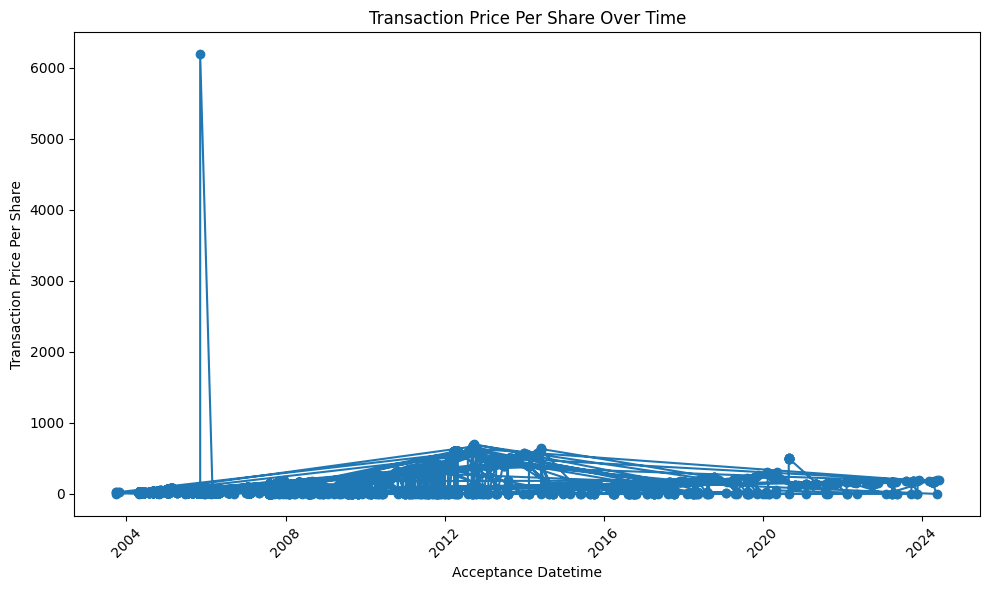

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['acceptanceDatetime'], df['transactionPricePerShare'], marker='o', linestyle='-')
plt.title('Transaction Price Per Share Over Time')
plt.xlabel('Acceptance Datetime')
plt.ylabel('Transaction Price Per Share')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Code for downloading a DF to CSV

from google.colab import files

# Convert DataFrame to CSV
df.to_csv('df_AAPL_new3.csv', index=False)  # Avoid saving the index as a column

# Trigger a browser download
files.download('df_AAPL_new3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>